# Finetuned BERT for QA
In this experiment, we gonna see, how BERT gonna handle the Question Answering problem with some illustrations and examples. In question answering, it appears that using a model already fine-tuned on the SQuAD benchmark could yield satisfactory results. In this Notebook, we'll demonstrate this approach and observe its effectiveness on text not included in the SQuAD dataset.

## 1. The SQuAD Benchmark
The SQuAD Benchmark refers to the Stanford Question Answering Dataset, a popular benchmark in natural language processing (NLP) and question answering tasks. It consists of a collection of questions posed by human annotators on a set of Wikipedia articles, along with the corresponding answers extracted from the articles. The goal is to develop models that can accurately answer questions based on the provided context passages. The SQuAD Benchmark has been widely used to evaluate the performance of various machine learning and NLP models in question answering tasks.

## 2. BERT input
To perform a QA task into BERT, we pack both the question and the context(reference) text into the input.

![image](http://mccormickml.com/assets/BERT/SQuAD/input_formatting.png)

Here, the two parts of text are separated by the special [SEP] token. BERT utilizes "Segment Embeddings" to distinguish between the question and the reference text. These embeddings, representing segments "A" and "B", are additional embeddings learned by BERT. They are combined with the token embeddings before being inputted into the model's input layer.

## 3. Start & End Token Classifiers
In BERT, identifying the answer involves highlighting a "span" of text, which is essentially predicting the tokens indicating the start and end of the answer within the input text.

![image](http://mccormickml.com/assets/BERT/SQuAD/start_token_classification.png)

For each token in the text, we input its final embedding into the start token classifier. This classifier utilizes a single set of weights (depicted by the blue "start" rectangle) that is applied uniformly to all words. By computing the dot product between the output embeddings and the 'start' weights, we generate a probability distribution across all words using the softmax activation function. The word with the highest probability of being the start token is then selected.

We repeat this process for the end token–we have a separate weight vector this

![image](http://mccormickml.com/assets/BERT/SQuAD/end_token_classification.png)

## 4. Example
In the code example below, we will download a pre-trained model that has already been fine-tuned for question answering and then apply it to our own text to see how it performs.

### 1. Install Huggingface transformers Library

In [1]:
!pip install transformers

### 2. Imports

In [2]:
import torch
import numpy as np

from transformers import BertForQuestionAnswering, BertTokenizer

### 3. Load the pretrained bert question answering model

In [3]:
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Load the tokenizer

In [4]:
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [5]:
print(tokenizer("Hello!, I am Suraj."))

{'input_ids': [101, 7592, 999, 1010, 1045, 2572, 7505, 13006, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}


### 4. Ask a question
A QA example consists of a question and a passage of text containing the answer to that question.

In [6]:
question = "Who directed the movie 'The Godfather'?"
answer_text = "The Godfather is a classic American crime film directed by Francis Ford Coppola. It was released in 1972 and is based on the novel of the same name by Mario Puzo. The movie stars Marlon Brando, Al Pacino, and James Caan, among others."

We’ll need to run the BERT tokenizer against both the question and the answer_text. To feed these into BERT, we actually concatenate them together and place the special [SEP] token in between.

In [7]:
# Apply the tokenizer to the input text, treating them as a text-pair.
input_ids = tokenizer.encode(question, answer_text)

print('The input has a total of {:} tokens.'.format(len(input_ids)))
print(input_ids)

The input has a total of 67 tokens.
[101, 2040, 2856, 1996, 3185, 1005, 1996, 23834, 1005, 1029, 102, 1996, 23834, 2003, 1037, 4438, 2137, 4126, 2143, 2856, 2011, 4557, 4811, 8872, 18155, 2050, 1012, 2009, 2001, 2207, 1999, 3285, 1998, 2003, 2241, 2006, 1996, 3117, 1997, 1996, 2168, 2171, 2011, 7986, 16405, 6844, 1012, 1996, 3185, 3340, 25861, 4435, 2080, 1010, 2632, 14397, 5740, 1010, 1998, 2508, 6187, 2319, 1010, 2426, 2500, 1012, 102]


Just to see exactly what the tokenizer is doing, let’s print out the tokens with their IDs.

In [8]:
tokens = tokenizer.convert_ids_to_tokens(input_ids)

# For each token and its id...
for token, id in zip(tokens, input_ids):

    # If this is the [SEP] token, add some space around it to make it stand out.
    if id == tokenizer.sep_token_id:
        print('')

    # Print the token string and its ID in two columns.
    print('{:<12} {:>6,}'.format(token, id))

    if id == tokenizer.sep_token_id:
        print('')


[CLS]           101
who           2,040
directed      2,856
the           1,996
movie         3,185
'             1,005
the           1,996
godfather    23,834
'             1,005
?             1,029

[SEP]           102

the           1,996
godfather    23,834
is            2,003
a             1,037
classic       4,438
american      2,137
crime         4,126
film          2,143
directed      2,856
by            2,011
francis       4,557
ford          4,811
cop           8,872
##pol        18,155
##a           2,050
.             1,012
it            2,009
was           2,001
released      2,207
in            1,999
1972          3,285
and           1,998
is            2,003
based         2,241
on            2,006
the           1,996
novel         3,117
of            1,997
the           1,996
same          2,168
name          2,171
by            2,011
mario         7,986
pu           16,405
##zo          6,844
.             1,012
the           1,996
movie         3,185
stars         3,34

We've combined the question and answer_text into one sequence, but BERT still needs a method to differentiate between them. BERT utilizes two special "Segment" embeddings: one for segment "A" and another for segment "B". Before the word embeddings are fed into the BERT layers, the segment A embedding is added to the question tokens, while the segment B embedding is added to each token in the answer_text.

Fortunately, the transformer library handles these additions for us. All we need to do is specify a '0' or '1' for each token.

Note: Although the token_type_ids term is used in the transformers library, I've opted for segment_ids as it seems clearer and aligns with the terminology in the BERT paper.

In [9]:
# Search the input_ids for the first instance of the `[SEP]` token.
sep_index = input_ids.index(tokenizer.sep_token_id)

print(sep_index)

# The number of segment A tokens includes the [SEP] token istelf.
num_seg_a = sep_index + 1

# The remainder are segment B.
num_seg_b = len(input_ids) - num_seg_a

# Construct the list of 0s and 1s.
segment_ids = [0]*num_seg_a + [1]*num_seg_b

# There should be a segment_id for every input token.
assert len(segment_ids) == len(input_ids)


10


Note: What about padding?

The original code example doesn't include any padding. This might be because it's only processing a single example. If we were to feed a batch of examples instead, we'd have to pad or truncate all samples in the batch to a uniform length and provide an attention mask to instruct BERT to disregard the padding tokens.

We’re ready to feed our example into the model!

In [10]:
# Run our example through the model.
with torch.no_grad():
  outputs = model(torch.tensor([input_ids]), # The tokens representing our input text.
                                 token_type_ids=torch.tensor([segment_ids])) # The segment IDs to differentiate question from answer_text

print(outputs.start_logits)
print(outputs.end_logits)

tensor([[-6.7891, -6.1522, -7.3357, -8.1564, -8.4897, -7.4417, -7.1850, -7.1675,
         -8.5684, -8.6765, -6.7891, -1.4206, -3.4987, -5.7930, -4.8985, -4.9559,
         -4.4036, -4.4120, -4.2444, -1.0589, -3.5092,  7.9074, -0.6113, -1.0224,
         -3.5661, -3.6181, -6.2198, -4.4993, -7.0125, -5.0958, -6.3210, -2.4208,
         -7.7647, -6.9598, -5.9245, -7.8357, -7.3919, -5.9120, -7.9883, -7.0421,
         -8.0519, -7.8125, -7.0787, -2.6163, -6.3317, -7.1115, -7.9037, -6.4614,
         -6.8424, -6.6095, -5.7421, -7.7132, -8.2724, -8.7008, -6.4327, -7.8361,
         -8.3174, -8.3829, -8.4018, -6.1062, -7.7368, -7.8459, -8.5732, -8.2608,
         -7.8931, -8.7988, -6.7893]])
tensor([[-1.9541, -5.7660, -6.6374, -7.3413, -7.2416, -7.5825, -7.3244, -4.5905,
         -6.2924, -5.7237, -1.9541, -5.1263, -2.0213, -6.1111, -6.7240, -6.0273,
         -4.4455, -4.6191, -3.4936, -3.0487, -4.7255, -1.5404,  0.3052, -2.9810,
         -1.4047,  7.8391,  4.1045, -5.0635, -5.5428, -5.1273, -6.0873,

Now we can highlight the answer just by looking at the most probable start and end words.

In [11]:
# Find the tokens with the highest `start` and `end` scores.
answer_start_index = outputs.start_logits.argmax()
answer_end_index = outputs.end_logits.argmax()

print(answer_start_index)
print(answer_end_index)

tensor(21)
tensor(25)


In [12]:
# Combine the tokens in the answer and print it out.
answer = ' '.join(tokens[answer_start_index:answer_end_index+1])

print('Answer: "' + answer + '"')

Answer: "francis ford cop ##pol ##a"


It’s a little naive to pick the highest scores for start and end–what if it predicts an end word that’s before the start word?! The correct implementation is to pick the highest total score for which end >= start.

In [13]:
# Start with the first token.
answer = tokens[answer_start_index]

# Select the remaining answer tokens and join them with whitespace.
for i in range(answer_start_index + 1, answer_end_index + 1):

    # If it's a subword token, then recombine it with the previous token.
    if tokens[i][0:2] == '##':
        answer += tokens[i][2:]

    # Otherwise, add a space then the token.
    else:
        answer += ' ' + tokens[i]

print('Answer: "' + answer + '"')


Answer: "francis ford coppola"


### 5. Visualizing the scores
I was curious to see what the scores were for all of the words. The following cells generate bar plots showing the start and end scores for every word in the input.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
#sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (16,8)

Retrieve all of the start and end scores, and use all of the tokens as x-axis labels.

In [15]:
# Pull the scores out of PyTorch Tensors and convert them to 1D numpy arrays.
s_scores = outputs.start_logits.detach().numpy().flatten()
e_scores = outputs.end_logits.detach().numpy().flatten()

In [16]:
print(s_scores)
print(e_scores)

[-6.789135  -6.1521783 -7.335665  -8.156365  -8.489737  -7.441706
 -7.185005  -7.167541  -8.568384  -8.676478  -6.789093  -1.4205902
 -3.4987354 -5.793044  -4.898537  -4.9559064 -4.4036226 -4.4120207
 -4.244368  -1.0589359 -3.5091543  7.9074373 -0.6112883 -1.02241
 -3.5661235 -3.6181278 -6.219808  -4.49929   -7.0125246 -5.0958395
 -6.321005  -2.420763  -7.764674  -6.9597507 -5.9244504 -7.8356514
 -7.3919134 -5.9119925 -7.9882627 -7.042137  -8.051857  -7.8125424
 -7.078683  -2.6162884 -6.331688  -7.1114993 -7.9036984 -6.461381
 -6.8423986 -6.6094575 -5.7421145 -7.71323   -8.272351  -8.700773
 -6.432741  -7.83613   -8.317356  -8.382853  -8.401827  -6.1062155
 -7.7368293 -7.8458767 -8.573242  -8.260819  -7.8930855 -8.79878
 -6.7892632]
[-1.954148   -5.7660184  -6.6374364  -7.3413353  -7.2415514  -7.582453
 -7.324419   -4.5904837  -6.2923717  -5.72373    -1.9540752  -5.1263337
 -2.0212831  -6.1110525  -6.724001   -6.0272717  -4.445531   -4.6190825
 -3.493555   -3.0486603  -4.725523   -1.54

In [17]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

<ipython-input-18-04dc520c223e>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels, y=s_scores, ci=None)
<ipython-input-18-04dc520c223e>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


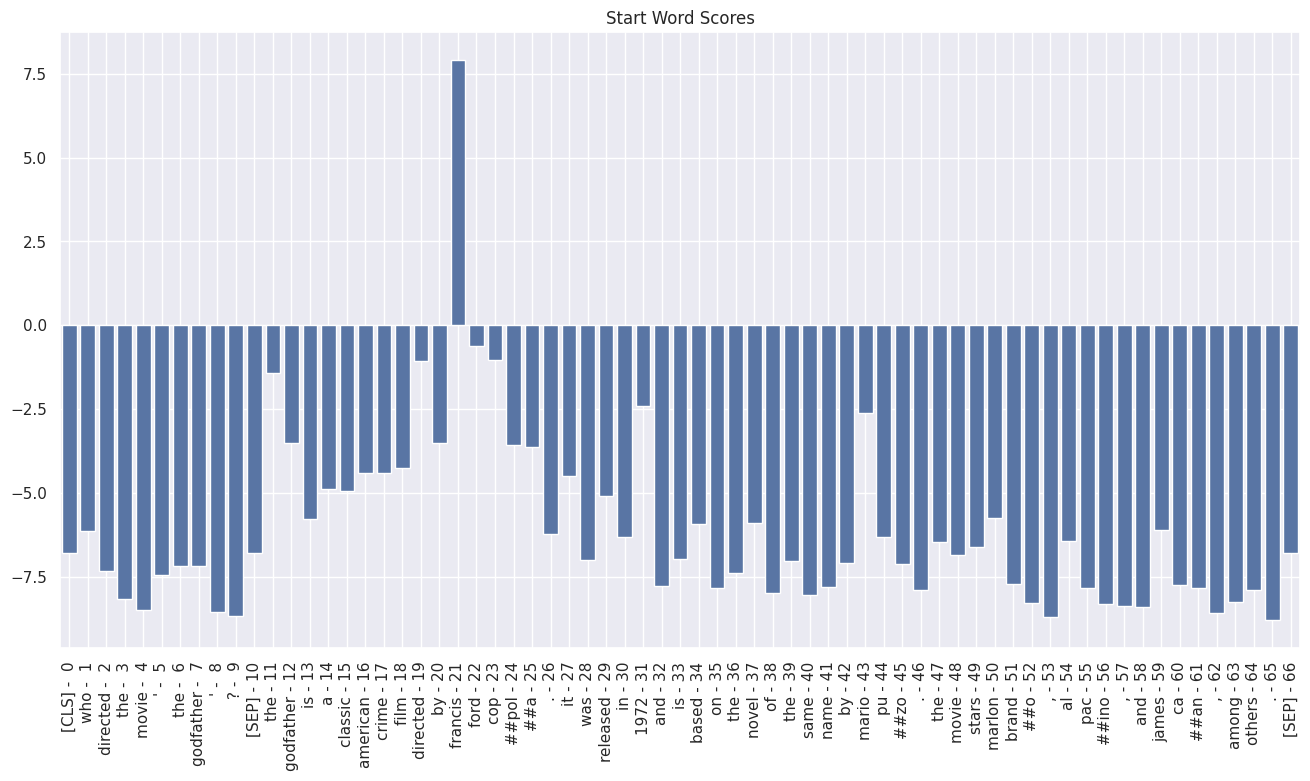

In [18]:
# Create a barplot showing the start word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=s_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('Start Word Scores')

plt.show()

Create a second bar plot showing the score for every input word being the “end” word.

<ipython-input-19-592a3843cb4d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x=token_labels, y=e_scores, ci=None)
<ipython-input-19-592a3843cb4d>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")


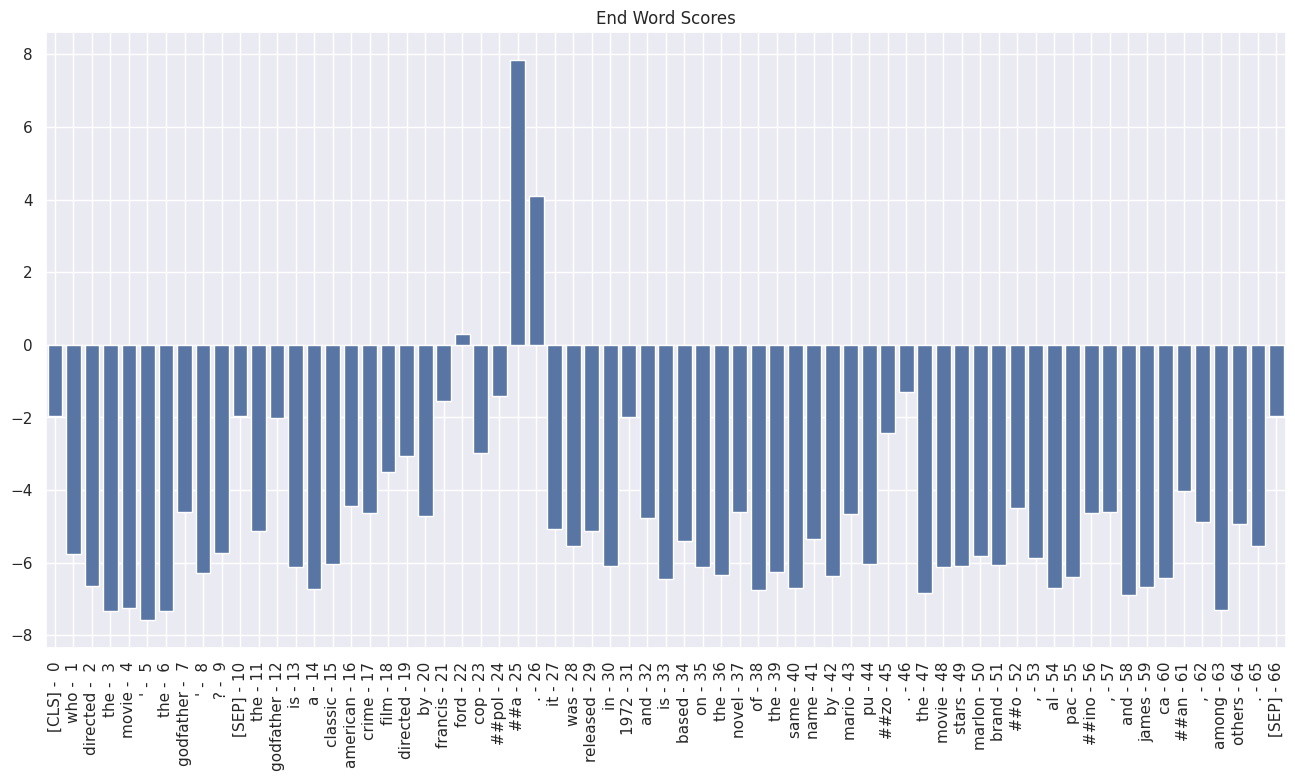

In [19]:
# Create a barplot showing the end word score for all of the tokens.
ax = sns.barplot(x=token_labels, y=e_scores, ci=None)

# Turn the xlabels vertical.
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="center")

# Turn on the vertical grid to help align words to scores.
ax.grid(True)

plt.title('End Word Scores')

plt.show()
